<a href="https://colab.research.google.com/github/LEFT-BEE/KMU-Algorithm/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99/PCA_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Pratice


### Pratice random data

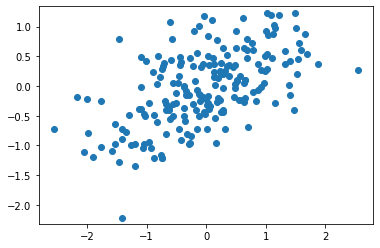

In [56]:
#랜덤 벡터로 PCA 실습
import torch
import matplotlib.pyplot as plt
import requests

rdata = torch.randn(200 , 2)

cov = torch.tensor([[1,0.3] , [0.2 , 0.6]])
z = rdata @ cov #행렬곱을 의미

plt.scatter(z[:,0] , z[:,1])
plt.axis("equal")
plt.show()

In [58]:
w = torch.randn(z.shape[1])
w = w / (torch.dot(w,w)**0.5)  

In [59]:
def findPC(z):
  dim = z.shape[1]
  w = torch.randn(dim) #random vec
  w = w / (torch.dot(w,w)**0.5) # unit vector

  lr = 0.1

  for epoch in range(1001):
    w.requires_grad_(True)
    variance = torch.mean(torch.sum(z * w, dim=1) ** 2)#projection
    variance.backward()

    with torch.no_grad():
      w = w+ lr*w.grad
      w = w/(torch.dot(w,w)**0.5)

  return w , variance.item()

In [60]:
def PCA(z,n):
  W= []
  V =[]
  for _ in range(n):
    w ,v = findPC(z)
    W.append(w)
    V.append(v)
    z = z- (z @ w.view(-1,1)) * w #projection point
  return W,V

W ,V = PCA(z,2)
W

[tensor([0.8790, 0.4768]), tensor([ 0.4768, -0.8790])]

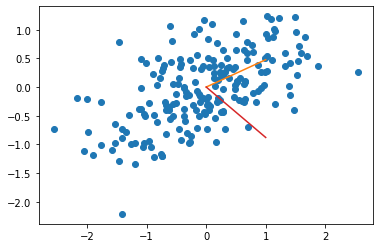

In [61]:
plt.scatter(z[:,0] , z[:,1])
plt.plot(0, W[0][0] , [0,W[0][1]])
plt.plot(0, W[1][0] , [0,W[1][1]])
plt.show()

## pratice Iris data

In [62]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)

vectors = []
answers = []
with open('iris.data', 'r') as f:
  for line in f:
    line = line.strip()
    if len(line) != 0:
      items = line.split(",")
      vectors.append([float(x) for x in items[:4]])
      answers.append(items[4])
species = {a: i for i, a in enumerate(set(answers))}

X = torch.FloatTensor(vectors) #feature vector
Z = (X - torch.mean(X, axis = 0)) #scailing

In [51]:
# W = n by 2 matrix 
# Z = len by n matrix 
def transform(Z,W):
  return Z @ torch.stack(W)

In [63]:
# n차원 공간 -> 2차원 공간
W ,V = PCA(Z,4)
K = transform(X ,W)

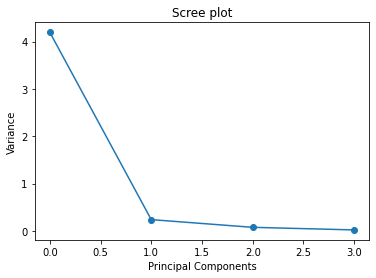

In [64]:
# pca를 진행할 수록 분산이 줄어든다. -> 정보를 잃음
plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

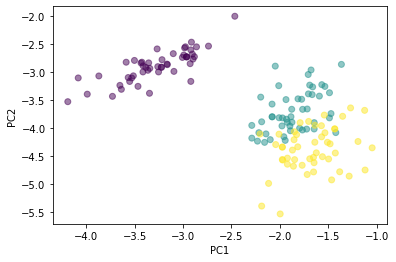

In [66]:
#4차원 벡터를 2차원 공간에 가장 잘 표현한 모습
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.show()